# Inteligentná analýza údajov 2019/2020 - Projekt
## Druhá časť - predspracovanie
## Ondrej Jedinák, František Tibenský

In [203]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

pd.options.display.max_colwidth=130
pd.set_option("display.max_columns", None)

## Konfigurácia

In [204]:
IN_PERSONAL = "data/personal_train.csv"
IN_OTHER = "data/other_train.csv"
OUT = "preprocessed.csv"
DATUM = "now"

## ---------------------

In [205]:
personal_data = pd.read_csv(IN_PERSONAL, index_col=0)
data = pd.read_csv(IN_OTHER, index_col=0)

In [206]:
for ds in [personal_data, data]:
    cls=ds.columns
    cl2=[]
    for cl in cls:
        cl2.append(cl.replace("-","_"))
    ds.rename(columns={i:j for i,j in zip(cls,cl2)}, inplace=True)

Nastavíme konzistentné názvy atribútov pre lepšiu prehľadnosť.

In [207]:
for ds in [data, personal_data]:
    for col in ds:
        if ds[col].dtype=='object':
            ds[col]=ds[col].str.strip()

data=data.replace('?',np.NaN)
data=data.replace('??',np.NaN)

Odstránime zo všetkých textových atribútov prázdne znaky na začiatku a konci a zmeníme hodnoty s otáznikmi na NaN.

In [208]:
display(personal_data.head())
data.head()

,name,address,age,sex,date_of_birth
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH 53211",58,Male,1961-03-11
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN 57550",56,Female,1962/11/20
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",59,Male,11/12/1959
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",66,Female,1953-03-18
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 77139",64,Male,1954-12-12


,name,address,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,medical_info,native_country,hours_per_week,capital_loss,workclass
0,Ernest Valles,"698 Miller Gateway Apt. 970\r\nClayside, ND 13457",White,Married-civ-spouse,Adm-clerical,f,10.0,Husband,0.198684,105.859375,0.0,0.222954,Some-college,343789.0,0.0,48.744348,>50K,"{'mean_oxygen':'0.790133779','std_oxygen':'10.13249696','kurtosis_oxygen':'17.68151382','skewness_oxygen':'374.9257754'}",United-States,40.0,0.0,State-gov
1,Michael Kowal,"4784 Walters Extensions\r\nEast Whitney, NH 27458",White,NaN,Sales,F,13.0,Not-in-family,-0.334631,120.453125,0.0,-0.049047,Bachelors,188957.0,0.0,50.982512,<=50K,"{'mean_oxygen':'18.69147157','std_oxygen':'51.21049055','kurtosis_oxygen':'2.541428789','skewness_oxygen':'4.930561896'}",United-States,40.0,0.0,Self-emp-not-inc
2,Mike Rogers,"068 Baker Estates Apt. 300\r\nRoberttown, NV 50205",White,Married-civ-spouse,Sales,f,13.0,Husband,0.030878,117.257812,0.0,0.121774,Bachelors,112283.0,0.0,42.893263,<=50K,"{'mean_oxygen':'1.150501672','std_oxygen':'11.49825164','kurtosis_oxygen':'16.48789423','skewness_oxygen':'320.6702352'}",United-States,55.0,0.0,Private
3,Marvin Cherry,"75326 Odom Drive\r\nNorth Robert, SC 99612",White,Married-civ-spouse,Farming-fishing,f,9.0,Husband,0.636882,99.429688,0.0,0.349696,HS-grad,166416.0,0.0,43.658777,<=50K,"{'mean_oxygen':'0.387123746','std_oxygen':'8.683190316000001','kurtosis_oxygen':'25.389201','skewness_oxygen':'685.06342239999...",United-States,99.0,0.0,Self-emp-not-inc
4,Bernard Williams,"258 Valerie Throughway\r\nSouth Samanthafort, TX 69130",Black,Widowed,Other-service,f,700.0,Not-in-family,0.105785,109.382812,0.0,0.232842,11th,462440.0,0.0,48.991568,<=50K,"{'mean_oxygen':'0.945652174','std_oxygen':'12.0495586','kurtosis_oxygen':'14.8422644','skewness_oxygen':'245.358921'}",United-States,20.0,0.0,Private


## date_of_birth

Tento atribút má nekonzistentné formáty dátumov.

Možne formáty dátumov:

1. yyyy-mm-dd
1. yyyy/mm/dd
1. yy-mm-dd
1. dd/mm/yyyy
1. yyyy-mm-dd 00:00:00
1. yyyy-mm-dd 00 00 00


In [209]:
personal_data["date_of_birth"]=personal_data["date_of_birth"].str.replace(" .*","")
personal_data["date_of_birth"]=personal_data["date_of_birth"].str.replace("/","-")
personal_data['date_of_birth']=personal_data['date_of_birth'].str.replace(r'([0-9]{2})-([0-9]{2})-([0-9]{4})', r'\3-\2-\1')

personal_data['date_of_birth']=personal_data['date_of_birth'].str.replace(r'^(19-[0-9]{2}-[0-9]{2})',r'19\1')
personal_data['date_of_birth']=personal_data['date_of_birth'].str.replace(r'^([2-9][0-9]-[0-9]{2}-[0-9]{2})',r'19\1')
personal_data['date_of_birth']=personal_data['date_of_birth'].str.replace(r'^([0-1][0-9]-[0-9]{2}-[0-9]{2})',r'20\1')

chceme všetky dátumy dostať do 1. formátu
- odstránime časové hodnoty
- zmeníme všetky / na -
- prehodíme rok a deň pri 4. prípade
- doplníme prvé dve cifry roku pre 3. prípad

In [210]:
personal_data["date_of_birth"].str.contains("(^[0-9]{4}-((0[0-9])|(1[0-2]))-([0-2][0-9]|(3)[0-1])$)").unique()

D:\Python\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


array([ True])

Kontrola či sú formáty jednotné.

## age

Zistíme rozdiely vo vekoch a dátumoch narodenia.

In [211]:
((pd.to_datetime(DATUM)-pd.to_datetime(personal_data["date_of_birth"])).astype('<m8[Y]')-personal_data["age"]).value_counts()

0.0    3606
1.0     327
dtype: int64

V dátumoch narodenia a vekoch nie sú žiadne výrazné nezrovnalosti. Jediný problém je že niektoré veky neboli aktualizované pre aktuálny dátum. Tiež neexistuje žiaden dátum pre ktorý by neboli aspoň niektoré veky o jeden rok posunuté. Preto si nanovo vypočítame veky k jednotnému dátumu.

In [212]:
personal_data["age"]=((pd.to_datetime(DATUM)-pd.to_datetime(personal_data["date_of_birth"])).astype('<m8[Y]'))

Keďže nám bude ďalej celý dátum narodenia zbytočný lebo máme vek, ponecháme len mesiac narodenia.

In [213]:
personal_data['date_of_birth']=personal_data['date_of_birth'].str.replace(r'([0-9]{4})-([0-9]{2})-([0-9]{2})', r'\2').astype(str).astype(float)
personal_data.rename(columns={"date_of_birth": "birth_month"},inplace=True)

## workclass

Opravíme nekonzistentné začiatočné písmená.

In [214]:
data["workclass"]=data["workclass"].str.capitalize()
data["workclass"].value_counts(dropna=False)

Private             2737
Self-emp-not-inc     304
Local-gov            266
NaN                  256
State-gov            146
Self-emp-inc         145
Federal-gov          125
Without-pay            3
Never-worked           1
Name: workclass, dtype: int64

## rozdelenie medical_data

In [215]:
data['medical_info']=data['medical_info'].replace(np.NaN,"{}")
data['medical_info']=data['medical_info'].str.replace("'",'"')
data=data.join(data['medical_info'].apply(json.loads).apply(pd.Series).astype(float))
data = data.drop(columns='medical_info')

Rozparsujeme hodnoty v JSON v medcal_data na samostatné stĺpce. Najprv však nahradíme NaN prázdnymi objektami a zmeníme uvodzovky aby boli validné pre JSON.

## education

In [216]:
data['education']=data['education'].str.replace("_","-")
data['education'].value_counts()

HS-grad         1279
Some-college     910
Bachelors        661
Masters          207
Assoc-voc        151
Assoc-acdm       136
11th             122
10th             114
7th-8th           92
Prof-school       68
9th               63
12th              47
Doctorate         46
5th-6th           45
1st-4th           14
Preschool         10
Name: education, dtype: int64

Zjednotíme nahradenie medzier v hodnotách.

## education_num

In [217]:
def edu_num_fix(val):
    if val<0:
        val*=-1
    if val>100:
        val/=100
    return val
data['education_num']=data['education_num'].apply(edu_num_fix)
data.education_num.value_counts()

9.0     1151
10.0     827
13.0     589
14.0     185
11.0     141
12.0     125
7.0      109
6.0       99
4.0       82
15.0      59
5.0       59
8.0       45
16.0      41
3.0       39
2.0       13
1.0        6
Name: education_num, dtype: int64

Zjednotíme hodnoty tak aby nám zostali len hodnoty od 1 do 16.

In [218]:
for i in range(1,17):
    print(str(data['education'][data.education_num==i].value_counts()))

Preschool    6
Name: education, dtype: int64
1st-4th    13
Name: education, dtype: int64
5th-6th    39
Name: education, dtype: int64
7th-8th    81
Name: education, dtype: int64
9th    59
Name: education, dtype: int64
10th    99
Name: education, dtype: int64
11th    108
Name: education, dtype: int64
12th    45
Name: education, dtype: int64
HS-grad    1147
Name: education, dtype: int64
Some-college    823
Name: education, dtype: int64
Assoc-voc    141
Name: education, dtype: int64
Assoc-acdm    125
Name: education, dtype: int64
Bachelors    587
Name: education, dtype: int64
Masters    184
Name: education, dtype: int64
Prof-school    59
Name: education, dtype: int64
Doctorate    41
Name: education, dtype: int64


In [219]:
edu={}
for i in range(1,17):
    edu[str(data['education'][data.education_num==i].value_counts()).split(" ")[0]]=i
edu

{'Preschool': 1,
 '1st-4th': 2,
 '5th-6th': 3,
 '7th-8th': 4,
 '9th': 5,
 '10th': 6,
 '11th': 7,
 '12th': 8,
 'HS-grad': 9,
 'Some-college': 10,
 'Assoc-voc': 11,
 'Assoc-acdm': 12,
 'Bachelors': 13,
 'Masters': 14,
 'Prof-school': 15,
 'Doctorate': 16}

Zistili sme že education_num je len číselná verzia eduaction. Doplníme podľa toho chýbajúce hodnoty education_num a stĺpec education môžeme zmazať.

In [220]:
def edu_to_num(val):
    if val in edu:
        return edu[val]
    else:
        return np.NaN
    
data['education']=data['education'].apply(edu_to_num)
data['education'].fillna(data['education_num'], inplace=True)

data['education'].value_counts(dropna=False)
data = data.drop(columns=['education_num'])

## Odstránenie duplikátov

In [221]:
def aggr(val):
    o=set()
    for v in val:
        if not pd.isna(v):
            o.add(v)
    if len(o)==0:
        return np.NaN
    elif len(o)>1:
        print("Pozor: viac moznych hodnot!")
        print(o)
    return o.pop()
    
data=data.groupby(['name', 'address']).aggregate(aggr)

Záznamy s rovnakými menami a adresami zjednotíme a doplníme ich hodnoty pomocou agregačnej funkcie.

## Spojenie dvoch tabuliek

In [222]:
data=personal_data.merge(data, on=('name', 'address'))

In [223]:
data.address=data.address.str.replace(r".*\r\n[A-Za-z ]+,? ([A-Z]{2}).*",r"\1")

In [224]:
data.rename(columns={"address": "state"},inplace=True)

## Odstránenie mena

In [225]:
data = data.drop(columns=['name'])

Z mena nevieme získať žiadne ďalšie využiteľné informácie, čiže ho môžeme odstrániť.

## zmena ***pregnant*** na binárnu hodnotu

In [226]:
data["pregnant"]=data["pregnant"].str.lower()
data["pregnant"]=data["pregnant"].str.replace("(^f$)|(^false$)","False")
data["pregnant"]=data["pregnant"].str.replace("(^t$)|(^true$)","True")
data["pregnant"]=data["pregnant"].str.replace("True","1")
data["pregnant"]=data["pregnant"].str.replace("False","0")
data["pregnant"]=data["pregnant"].str.replace("True","1")
data["pregnant"]=data["pregnant"].astype(float)
data["pregnant"].value_counts(dropna=False)

0.0    3851
1.0      82
Name: pregnant, dtype: int64

Nekonzistentné hodnoty zmeníme tak aby boli len True alebo False (a NaN) a prekonvertujeme ich na 0 a 1.

In [227]:
data[data["sex"]=="Male"].pregnant.unique()

array([0., 1.])

Existujú záznamy kde sú muži tehotní.

In [228]:
data.loc[data.sex == "Male", "pregnant"] = 0
data['pregnant'] = data['pregnant'].fillna(0)

Mužom nastavíme tehotenstvo na 0. V prípade prázdnych hodnôt budeme predpokladať že daná osoba tehotná nie je a nastavíme jej hodnotu na 0.

## zmena ***sex*** na binárnu hodnotu

In [229]:
data["sex"]=data["sex"].str.replace("Male","1")
data["sex"]=data["sex"].str.replace("Female","0")
data["sex"]=data["sex"].astype(float)
data.rename(columns={"sex": "male"},inplace=True)
data["male"].value_counts(dropna=False)

1.0    2579
0.0    1354
Name: male, dtype: int64

# Nahradenie číselných NaN hodnôt + vysporiadanie sa s outliermi

V zadaní je spomenutých viacero metód, ako nahradiť chýbajúce číselné hodnoty, rozhodli sme sa, že využijem doplnenie priemerom a doplnenie priemerom zo segmentu.



V zadaní sú spomenuté tri metódy, ako sa vysporiadať s vychýlenými hodnotami:
- odstránenie týchto pozorovaní
- nahradenie 5 resp. 95 percentilom
- transformácia atribútu cez vybranú funkciu (logaritmus, odmocnina)

Rozhodli sme sa, že využijeme druhý a tretí spôsob.


## fnlwgt


Najprv zistíme, či sú nejaké NaN hodnoty.

In [230]:
data["fnlwgt"].isnull().sum()

0

V tomto stĺpci žiadne hodnoty NaN nie sú, nepotrebuje riešiť nahradzovanie hodnôt.

Následne zistíme, či sú prítomné nejaké hodnoty, ktoré sú príliš odchýlené.

count      3933.000000
mean     187429.579964
std      104399.718085
min       19491.000000
25%      116358.000000
50%      177154.000000
75%      235124.000000
max      953588.000000
Name: fnlwgt, dtype: float64

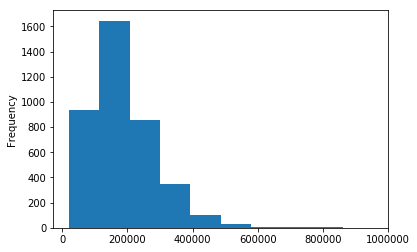

In [231]:
data["fnlwgt"].plot(kind="hist")
data["fnlwgt"].describe()

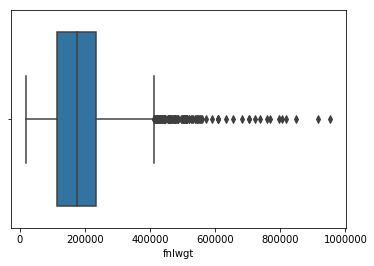

In [232]:
sns.boxplot('fnlwgt', data=data)

Ako môžeme vidieť, v tomto prípade sa outliery vyskytujú a to v hodnotách od cca 600000 do max, ktoré je 953588. Vychýlené hodnoty nahradíme 95 percentilom.

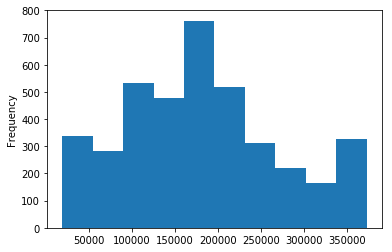

In [233]:
data["fnlwgt"] = data["fnlwgt"].clip( upper=data["fnlwgt"].quantile(0.95))
data["fnlwgt"].plot(kind="hist")


## Hodnoty agregovaných hodnôt cukrovky



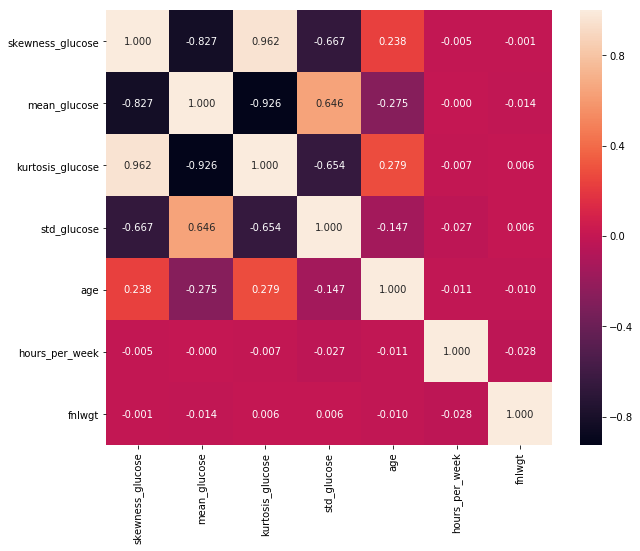

In [234]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data[['skewness_glucose', 'mean_glucose','kurtosis_glucose','std_glucose','age','hours_per_week','fnlwgt']].corr(), ax=ax, annot=True, fmt=".3f")

Spravili sme si heat mapu, aby sme videli, co moze vplyvat na nas atribut a zvolili sme si, ze budeme priradovat priemer z ludi, ktori maju rovnaky vek, pretoze je vidiet, ze jemne koreluje s nasimi atributmi, ci uz jednym alebo druhym smerom.

### skewness

In [235]:
data["skewness_glucose"].isnull().sum()

1

TODO: nahradit priemerom zo segmentu

Spravili sme si heat mapu, aby sme videli, co moze vplyvat na nas atribut a zvolili sme si, ze budeme priradovat priemer z ludi, ktori maju rovnaky vek, pretoze je vidiet, ze jemne koreluje s nasim atributom.

In [236]:
df = data[data["skewness_glucose"].isnull()]
dfAge = df.iloc[0]['age']
df_fill = data.loc[data["age"] == dfAge]
fillAvg = df_fill['skewness_glucose'].mean()
data.fillna({'skewness_glucose':fillAvg}, inplace = True)


count    3933.000000
mean        4.219730
std         9.677885
min        -1.755332
25%        -0.119347
50%         0.375487
75%         2.090761
max        68.101622
Name: skewness_glucose, dtype: float64

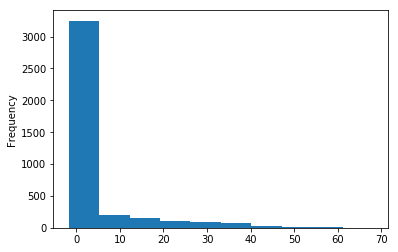

In [237]:
data["skewness_glucose"].plot(kind="hist")
data["skewness_glucose"].describe()

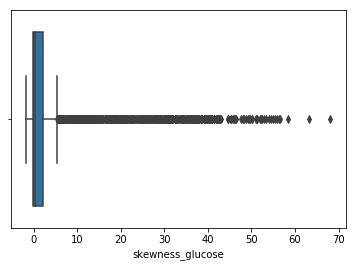

In [238]:
sns.boxplot('skewness_glucose', data=data)

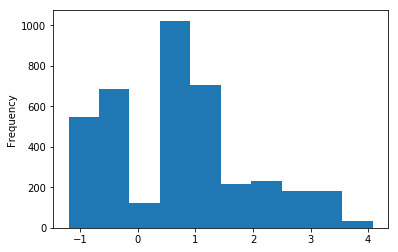

In [239]:

df = np.cbrt(data["skewness_glucose"])
df.plot(kind="hist")

Údaje v tomto stĺpci sme prentransformovali podľa tretej odmocniny.

### mean

In [240]:
data["mean_glucose"].isnull().sum()

0

count    3933.000000
mean      101.277271
std        33.560209
min         6.187500
25%        87.742188
50%       110.664062
75%       124.132812
max       189.734375
Name: mean_glucose, dtype: float64

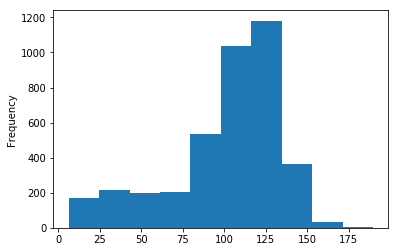

In [241]:
data["mean_glucose"].plot(kind="hist")
data["mean_glucose"].describe()

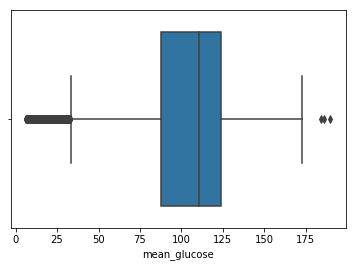

In [242]:
sns.boxplot('mean_glucose', data=data)

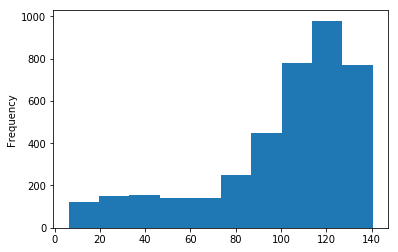

In [243]:
data["mean_glucose"]= data["mean_glucose"].clip( upper=data["mean_glucose"].quantile(0.95))
data["mean_glucose"].plot(kind="hist")

### kurtosis

In [244]:
data["kurtosis_glucose"].isnull().sum()

1

In [245]:
df = data[data["kurtosis_glucose"].isnull()]
dfAge = df.iloc[0]['age']
df_fill = data.loc[data["age"] == dfAge]
fillAvg = df_fill['kurtosis_glucose'].mean()
data.fillna({'kurtosis_glucose':fillAvg}, inplace = True)


count    3933.000000
mean        0.951394
std         1.610959
min        -1.641515
25%         0.072144
50%         0.310784
75%         0.778607
max         8.069522
Name: kurtosis_glucose, dtype: float64

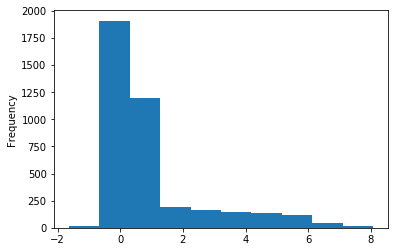

In [246]:
data["kurtosis_glucose"].plot(kind="hist")
data["kurtosis_glucose"].describe()

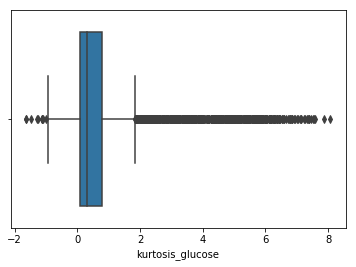

In [247]:
sns.boxplot('kurtosis_glucose', data=data)

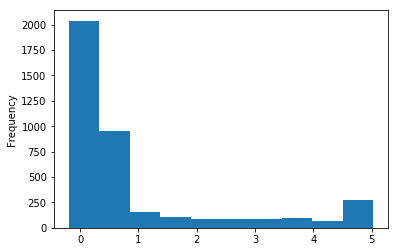

In [248]:
df= data["kurtosis_glucose"].clip(lower=data["kurtosis_glucose"].quantile(0.05), upper=data["kurtosis_glucose"].quantile(0.95))
df.plot(kind="hist")

### std

In [249]:
data["std_glucose"].isnull().sum()

0

count    3933.000000
mean       45.174684
std         7.607881
min        25.695250
25%        40.165726
50%        45.887420
75%        50.369068
max        91.206475
Name: std_glucose, dtype: float64

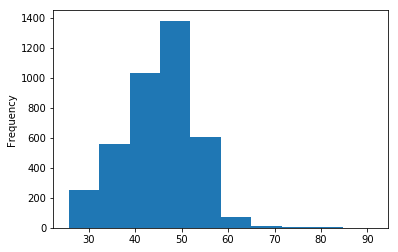

In [250]:
data["std_glucose"].plot(kind="hist")
data["std_glucose"].describe()

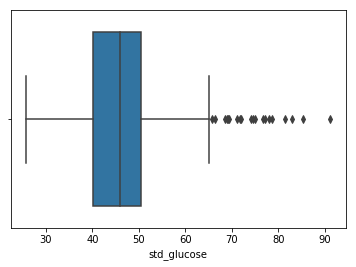

In [251]:
sns.boxplot('std_glucose', data=data)

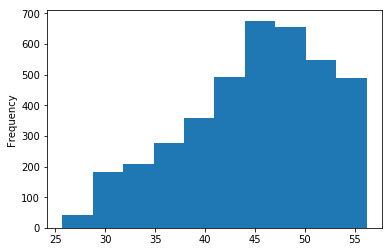

In [252]:
data["std_glucose"]= data["std_glucose"].clip( upper=data["std_glucose"].quantile(0.95))
data["std_glucose"].plot(kind="hist")

## hours_per_week

In [253]:
data["hours_per_week"].isnull().sum()

0

count    3933.000000
mean       40.129672
std        12.103234
min         1.000000
25%        40.000000
50%        40.000000
75%        45.000000
max        99.000000
Name: hours_per_week, dtype: float64

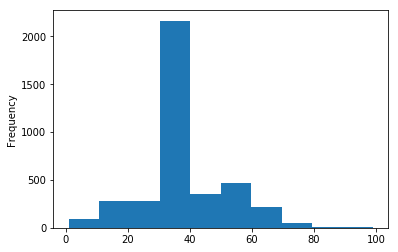

In [254]:
data["hours_per_week"].plot(kind="hist")
data["hours_per_week"].describe()

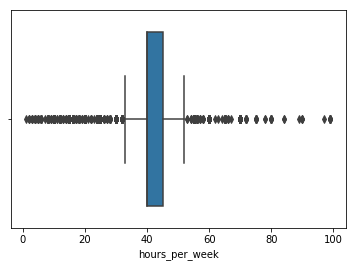

In [255]:
sns.boxplot('hours_per_week', data=data)

Nepamatas sa, co nam hovoril s tymto, ze co robit, ked tam niekto tych 99 hodin, ci to nechat alebo co?

## Agregovane hodnoty kyslika

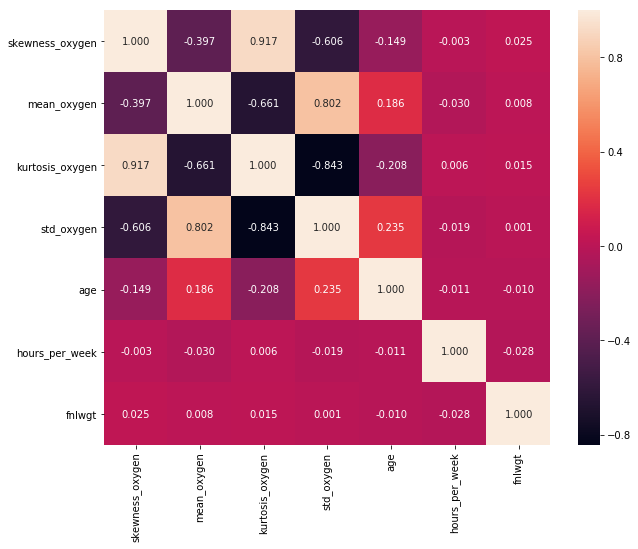

In [256]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data[['skewness_oxygen', 'mean_oxygen','kurtosis_oxygen','std_oxygen','age','hours_per_week','fnlwgt']].corr(), ax=ax, annot=True, fmt=".3f")

Z heat mapy je možné vidieť, že hodnoty kyslíka jemne korelujú s vekom. Preto v niektorých atribútoch pri nahrádzaní budeme brať vek na ohľad.

### skewness

In [257]:
data["skewness_oxygen"].isnull().sum()

1

In [258]:
data.fillna({'skewness_oxygen':data['skewness_oxygen'].mean()}, inplace = True)

Chýbajúcu hodnotu nahradíme celkovým priemerom zo vzorky.

count    3933.000000
mean       91.297976
std       108.552002
min        -1.976976
25%        12.866679
50%        68.490474
75%       127.012005
max      1191.000837
Name: skewness_oxygen, dtype: float64

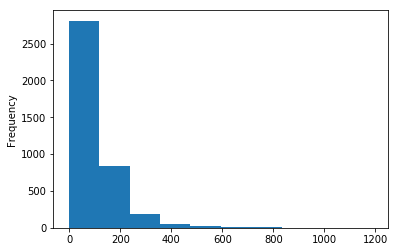

In [259]:
data["skewness_oxygen"].plot(kind="hist")
data["skewness_oxygen"].describe()

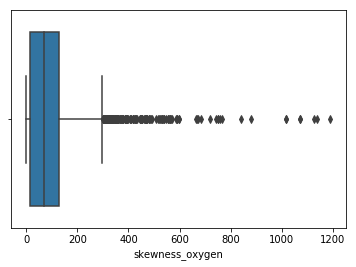

In [260]:
sns.boxplot('skewness_oxygen', data=data)

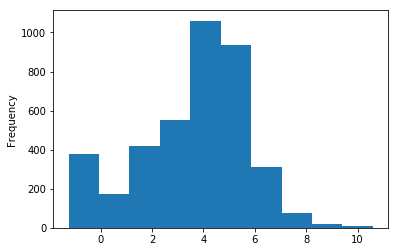

In [284]:
data["skewness_oxygen"]= np.cbrt(data["skewness_oxygen"])
data["skewness_oxygen"].plot(kind="hist")

Hodnoty v stĺpcoch sme pretransformovali podľa tretej odmocniny.

### mean

In [262]:
data["mean_oxygen"].isnull().sum()

1

In [263]:
df = data[data["mean_oxygen"].isnull()]
dfAge = df.iloc[0]['age']
df_fill = data.loc[data["age"] == dfAge]
fillAvg = df_fill['mean_oxygen'].mean()
data.fillna({'mean_oxygen':fillAvg}, inplace = True)


count    3933.000000
mean       18.482930
std        34.788613
min         0.213211
25%         2.065217
50%         3.236622
75%        12.647993
max       217.371238
Name: mean_oxygen, dtype: float64

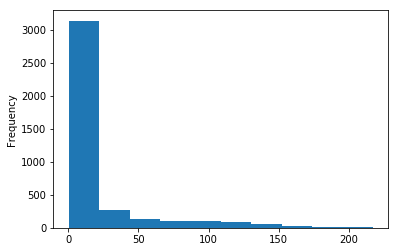

In [264]:
data["mean_oxygen"].plot(kind="hist")
data["mean_oxygen"].describe()

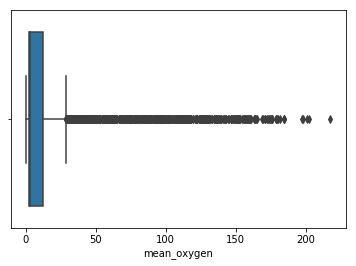

In [265]:
sns.boxplot('mean_oxygen', data=data)

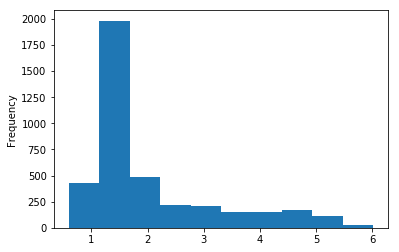

In [285]:
data["mean_oxygen"]= np.cbrt(data["mean_oxygen"])
data["mean_oxygen"].plot(kind="hist")

Hodnoty sme opat pretransformovali podla tretej odmocniny.

### kurtosis

In [267]:
data["kurtosis_oxygen"].isnull().sum()

1

In [277]:
data.fillna({'kurtosis_oxygen':data['kurtosis_oxygen'].mean()}, inplace = True)

count    3933.000000
mean        7.413030
std         4.812078
min        -2.597872
25%         3.637833
50%         7.781618
75%        10.261581
max        34.539844
Name: kurtosis_oxygen, dtype: float64

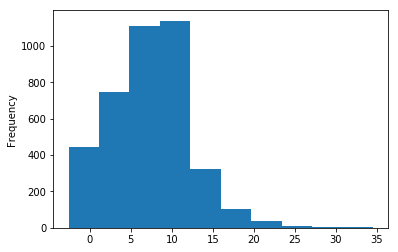

In [278]:
data["kurtosis_oxygen"].plot(kind="hist")
data["kurtosis_oxygen"].describe()

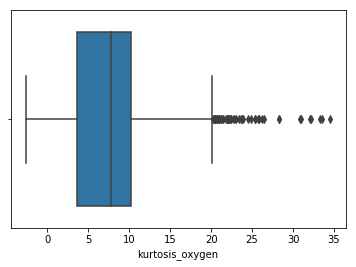

In [269]:
sns.boxplot('kurtosis_oxygen', data=data)

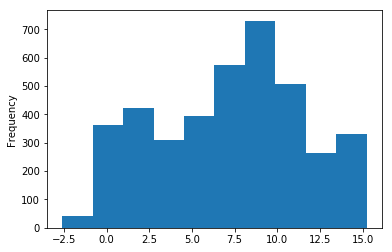

In [286]:
data["kurtosis_oxygen"] = data["kurtosis_oxygen"].clip( upper=data["kurtosis_oxygen"].quantile(0.95))
data["kurtosis_oxygen"].plot(kind="hist")

### std

In [280]:
data["std_oxygen"].isnull().sum()

0

In [279]:
df = data[data["std_oxygen"].isnull()]
dfAge = df.iloc[0]['age']
df_fill = data.loc[data["age"] == dfAge]
fillAvg = df_fill['std_oxygen'].mean()
data.fillna({'std_oxygen':fillAvg}, inplace = True)

count    3933.000000
mean       31.158014
std        22.266866
min         7.370432
25%        15.040684
50%        20.567593
75%        43.221350
max       110.642211
Name: std_oxygen, dtype: float64

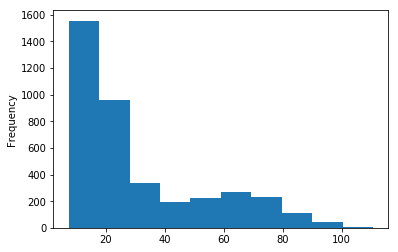

In [281]:
data["std_oxygen"].plot(kind="hist")
data["std_oxygen"].describe()

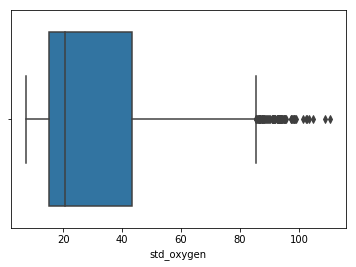

In [282]:
sns.boxplot('std_oxygen', data=data)

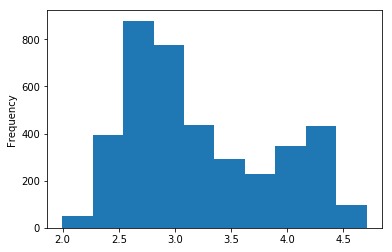

In [288]:
data["std_oxygen"]= np.log(data["std_oxygen"])
data["std_oxygen"].plot(kind="hist")

In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 3932
Data columns (total 25 columns):
state               3933 non-null object
age                 3933 non-null float64
male                3933 non-null float64
birth_month         3933 non-null float64
race                3932 non-null object
marital_status      3540 non-null object
occupation          3695 non-null object
pregnant            3933 non-null float64
relationship        3933 non-null object
skewness_glucose    3933 non-null float64
mean_glucose        3933 non-null float64
kurtosis_glucose    3933 non-null float64
education           3933 non-null float64
fnlwgt              3933 non-null float64
class               3933 non-null float64
std_glucose         3933 non-null float64
income              3932 non-null object
native_country      3852 non-null object
hours_per_week      3933 non-null float64
workclass           3695 non-null object
mean_oxygen         3933 non-null float64
std_oxygen         

## spojenie capital_loss a capital_gain

In [276]:
data = data.assign(capital=np.NaN)
data.capital = data.capital_gain - data.capital_loss
data = data.drop(columns=['capital_loss','capital_gain'])

# Znovupoužitelnosť predspracovania

pod tento nadpis urobit tu znovu pouzitelnost...pouzivame na doplnenie priemer, resp. priemer zo segmentu podla veku, na vyriesenie outlierov bud nahradime len 95 percentil alebo aj 5 + niektore atributy transformujeme podla 3. odmocniny, resp. logaritmu.


# Opätovná realizácia podstatných častí prieskumnej analýzy


V tejto časti sa zameriame najmä na atribúty, ktoré sú pre nás nové (agregované hodnoty kyslíka, birth_month) alebo tie, ktoré sme zmenili radikálnejším spôsobom (education). Dalej si zobrazime heatmapu aj s novymi atributmi a zanalyzujeme nove korelacie. 

### education

9.0     1261
10.0     904
13.0     657
14.0     207
11.0     151
12.0     135
7.0      122
6.0      113
4.0       92
15.0      68
5.0       63
8.0       47
16.0      45
3.0       45
2.0       13
1.0       10
Name: education, dtype: int64

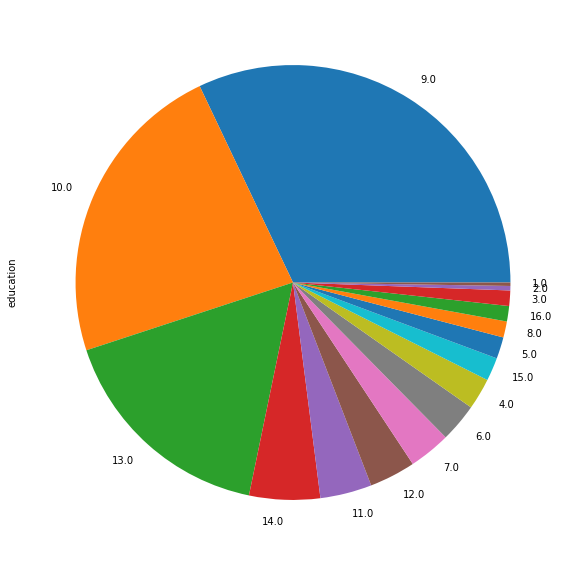

In [293]:
data["education"].value_counts().plot(kind='pie', figsize=(15,10))
data["education"].value_counts(dropna=False)
# po zjednoteni na 1.stupen, druhy, SS, VS a tak urobit znova

## Agregovane hodnoty kyslika

s tymito hodnotami sme uz pracovali, chybajuce udaje sme nahradili bud priemerom alebo priemerom zo segmentu (rovnaky vek).
Tieto atributy su uz bez oulierov, bud sme ich nahradili percentilo alebo pretransformovali podla tretej odmocniny, resp. logaritmu.

### skewness

D:\Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


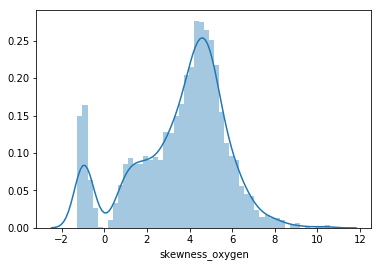

In [294]:
data["skewness_oxygen"].value_counts(dropna=False)
skew = data["skewness_oxygen"].fillna(axis=0, method='ffill')
ax = sns.distplot(skew,bins=50)

In [295]:
data["skewness_oxygen"].describe()

count    3933.000000
mean        3.599601
std         2.155236
min        -1.255068
25%         2.343269
50%         4.091445
75%         5.026684
max        10.599955
Name: skewness_oxygen, dtype: float64

Vidime, ze najviac hodnot sa hybe okolo 4, maximum je nad 10 a minimum je v cca -1.

### mean

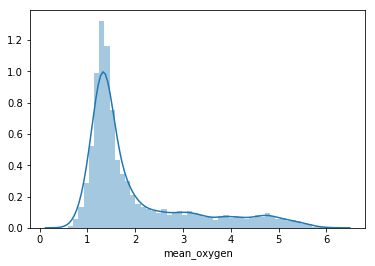

In [298]:
data["mean_oxygen"].value_counts(dropna=False)
skew = data["mean_oxygen"].fillna(axis=0, method='ffill')
ax = sns.distplot(skew,bins=50)

In [297]:
data["mean_oxygen"].describe()

count    3933.000000
mean        2.007724
std         1.155711
min         0.597406
25%         1.273470
50%         1.479213
75%         2.329917
max         6.012670
Name: mean_oxygen, dtype: float64

Tu vidime, ze atribut je po transformacii v peknom longtail rozdeleni, s medianom 1,4.

### kurtosis

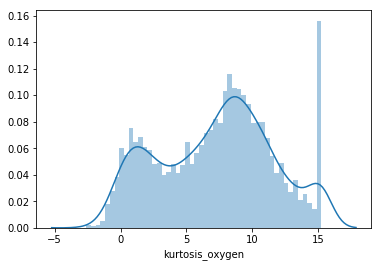

In [300]:
data["kurtosis_oxygen"].value_counts(dropna=False)

ax = sns.distplot(data["kurtosis_oxygen"],bins=50)

count    3933.000000
mean        7.229702
std         4.340971
min        -2.597872
25%         3.637833
50%         7.781618
75%        10.261581
max        15.240830
Name: kurtosis_oxygen, dtype: float64

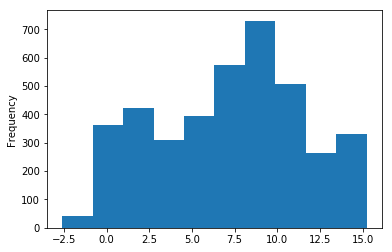

In [302]:
data["kurtosis_oxygen"].plot(kind="hist")
data["kurtosis_oxygen"].describe()

Na zaklade tychto grafov je mozne vidiet, ze najviac hodnot je okolo 8-10.

### std

count    3933.000000
mean        3.219952
std         0.639663
min         1.997476
25%         2.710759
50%         3.023717
75%         3.766335
max         4.706302
Name: std_oxygen, dtype: float64

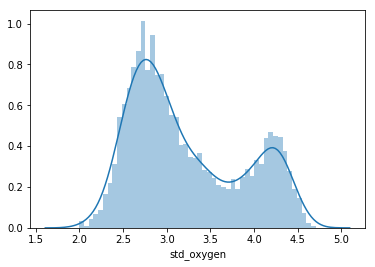

In [305]:
ax = sns.distplot(data["std_oxygen"],bins=50)
data["std_oxygen"].describe()

Tu vidime, ze vela hodnot je medzi 2.5 a 3 a potom mensi vrchol je medzi 4 a 4.5.

## birth_month

12.0    362
5.0     356
4.0     339
11.0    338
9.0     334
6.0     330
3.0     328
10.0    324
7.0     319
8.0     315
1.0     309
2.0     279
Name: birth_month, dtype: int64

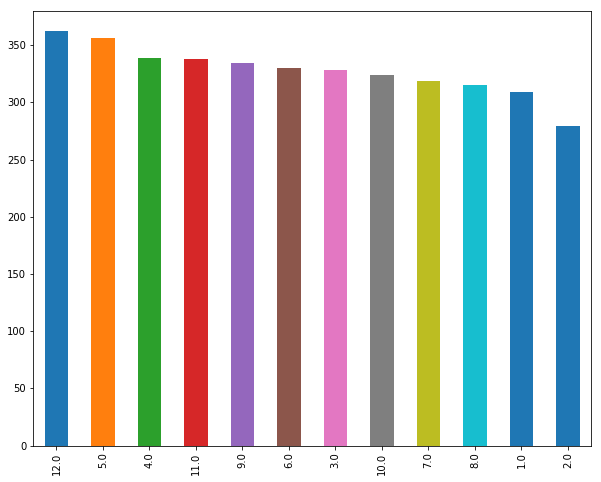

In [306]:
data["birth_month"].value_counts().plot(kind='bar', figsize=(10,8))
data["birth_month"].value_counts(dropna=False)

Vidíme, že ľudia sú prevažne narovnako rozdelení do každého mesiaca roka.

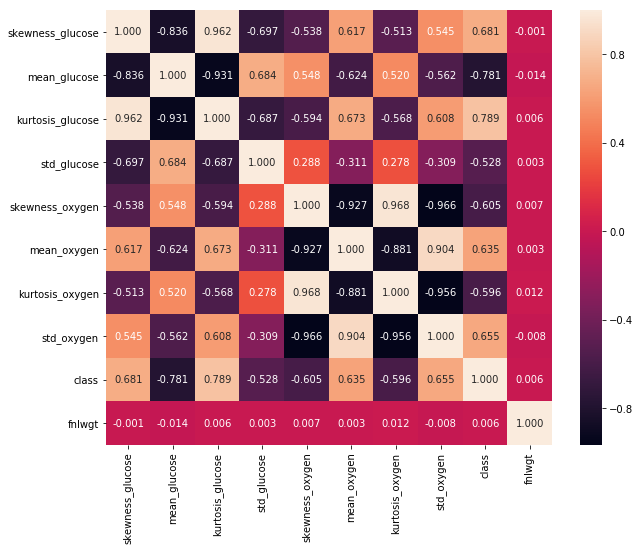

In [310]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data[['skewness_glucose', 'mean_glucose','kurtosis_glucose','std_glucose','skewness_oxygen', 'mean_oxygen','kurtosis_oxygen','std_oxygen','class','fnlwgt']].corr(), ax=ax, annot=True, fmt=".3f")

Na heatmape zobrazujeme, len medicinske atributy (hodnoty kyslika a cukru), kedze heatmapa z prvej etapy nam ukazala, ze ostatne atributy nemaju takmer ziadny vplyv. vid. heat mapa pod touto bunkou.
Pri pohlada na tuto heatmapu je zrejme, že agregovane hodnoty kyslika mozu sluzit ako prediktory pre atribut class a v porovnani s hodnotami cukru su sposoby korelacie presne opacne (v hodnotach cukru maju priamu umeru skewness a kurtosis a nepriamu mean a std a v hodnotach kysliku je to naopak).


Heatmapa z prvej etapy, kde vidno, že ostatné nami zvolené atribúty majú zanedbateľný vplyv:

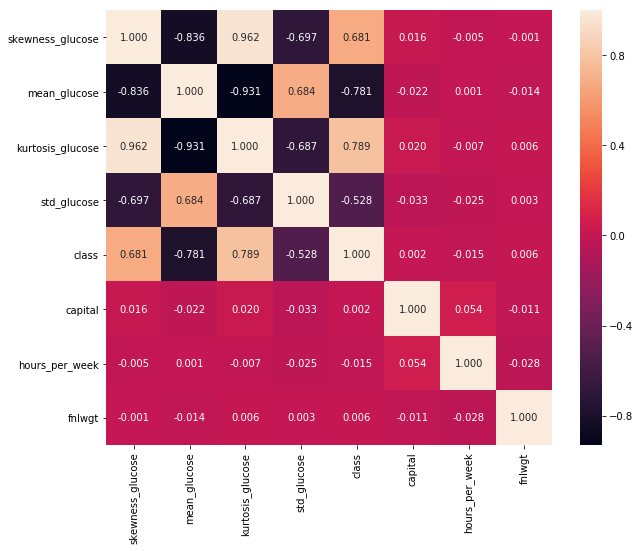

In [313]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data[['skewness_glucose', 'mean_glucose','kurtosis_glucose','std_glucose','class','capital','hours_per_week','fnlwgt']].corr(), ax=ax, annot=True, fmt=".3f")

TODO:
- zmenit stringove atributy na boolean resp. dictionary
- doplnit marital-status cez relationship
- prieskumna analyza pre oxygeny, education, age, birth_month
- znovupouzitelnost